In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report, r2_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## Importing the data

In [16]:
df = pd.read_csv('final_df.csv')

## Data prep

In [17]:
df_complete_target = df['Rain Tomorrow']

df_complete_inputs = df.drop(columns = ['Rain Tomorrow'])
df_complete_inputs

,Year,Month,Day,Center,North,South,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Rain Today
0,2008,12,1,0,0,1,13.4,22.9,0.6,4.574588,44.0,20.0,24.0,71.0,22.0,8.0,6.0,16.9,21.8,0
1,2008,12,2,0,0,1,7.4,25.1,0.0,6.989182,44.0,4.0,22.0,44.0,25.0,3.0,3.0,17.2,24.3,0
2,2008,12,3,0,0,1,12.9,25.7,0.0,9.978443,46.0,19.0,26.0,38.0,30.0,4.0,2.0,21.0,23.2,0
3,2008,12,4,0,0,1,9.2,28.0,0.0,7.461850,24.0,11.0,9.0,45.0,16.0,1.0,2.0,18.1,26.5,0
4,2008,12,5,0,0,1,17.5,32.3,1.0,3.985550,41.0,7.0,20.0,82.0,33.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137057,2017,6,20,1,0,0,3.5,21.8,0.0,9.096045,31.0,15.0,13.0,59.0,27.0,3.0,3.0,9.4,20.9,0
137058,2017,6,21,1,0,0,2.8,23.4,0.0,10.161455,31.0,13.0,11.0,51.0,24.0,2.0,3.0,10.1,22.4,0
137059,2017,6,22,1,0,0,3.6,25.3,0.0,8.396412,22.0,13.0,9.0,56.0,21.0,2.0,3.0,10.9,24.5,0
137060,2017,6,23,1,0,0,5.4,26.9,0.0,6.316119,37.0,9.0,9.0,53.0,24.0,3.0,3.0,12.5,26.1,0


In [18]:
seed = 0
# Split into training+validation and testing sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(df_complete_inputs.values, df_complete_target.values, test_size=0.1, random_state=42)
# Split training+validation set into training and validation sets (Of the 80% for training and validation, 90*0.21 = 12% is validation and 68% is training )
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.21, random_state=42)

In [19]:
X_train.shape, X_test.shape, X_val.shape

((97450, 20), (13707, 20), (25905, 20))

In [20]:
y_train.shape, y_test.shape, y_val.shape

((97450,), (13707,), (25905,))

## Neural network model

Binary Crossentropy is used for binary classification problems. 
It measures the difference between two probability distributions: the true distribution and the predicted distribution.


In [7]:
# Build a simple neural network model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Binary Crossentropy is used for binary classification problems. 
# It measures the difference between two probability distributions: the true distribution and the predicted distribution.

# Train the model
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

/home/acr/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-27 20:45:02.587736: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 20:45:02.590164: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requir

Epoch 1/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7665 - loss: 1.8386 - val_accuracy: 0.7941 - val_loss: 0.4557
Epoch 2/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8099 - loss: 0.4711 - val_accuracy: 0.8322 - val_loss: 0.3753
Epoch 3/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8134 - loss: 0.4621 - val_accuracy: 0.8003 - val_loss: 0.6076
Epoch 4/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8158 - loss: 0.4508 - val_accuracy: 0.8036 - val_loss: 0.4248
Epoch 5/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8188 - loss: 0.4362 - val_accuracy: 0.8311 - val_loss: 0.3767
Epoch 6/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8241 - loss: 0.4107 - val_accuracy: 0.8401 - val_loss: 0.3636
Epoch 7/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8302 - loss: 0.3980 - val_accuracy: 0.8442 - val_loss: 0.3610
Epoch 8/20
3046/3046 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8335 - loss: 0.3865 

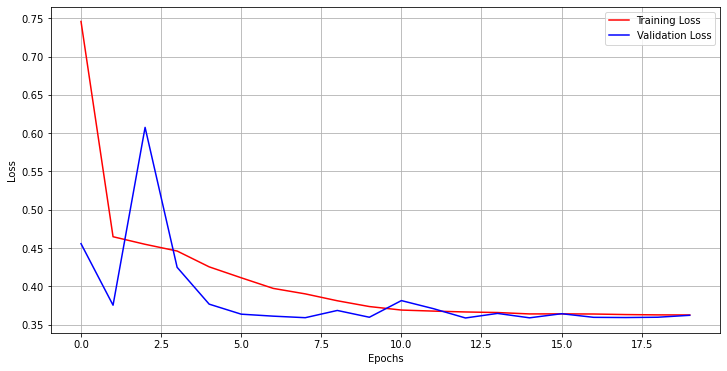

In [8]:
#Creation of the loss plot

losses = pd.DataFrame(data = {
    'epoch': [i for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(losses.epoch, losses.loss, 'red', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'blue', label = 'Validation Loss')
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [22]:
# Neural network model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, min_lr=5e-6)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7141 - loss: 2.7425 - val_accuracy: 0.7804 - val_loss: 0.5171 - learning_rate: 0.0010
Epoch 2/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7830 - loss: 0.4940 - val_accuracy: 0.8380 - val_loss: 0.4161 - learning_rate: 0.0010
Epoch 3/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8151 - loss: 0.4203 - val_accuracy: 0.7979 - val_loss: 0.4045 - learning_rate: 0.0010
Epoch 4/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8226 - loss: 0.4011 - val_accuracy: 0.8314 - val_loss: 0.3820 - learning_rate: 0.0010
Epoch 5/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8301 - loss: 0.3920 - val_accuracy: 0.8343 - val_loss: 0.3878 - learning_rate: 0.0010
Epoch 6/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8351 - loss: 0.3879 - val_accuracy: 0.8404 - val_loss: 0.3753 - learning_rate: 0.0010
Epoch 7/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accu

Epoch 44/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8420 - loss: 0.3666 - val_accuracy: 0.8484 - val_loss: 0.3564 - learning_rate: 2.0000e-04
Epoch 45/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8440 - loss: 0.3650 - val_accuracy: 0.8483 - val_loss: 0.3627 - learning_rate: 2.0000e-04
Epoch 46/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8431 - loss: 0.3663 - val_accuracy: 0.8487 - val_loss: 0.3583 - learning_rate: 2.0000e-04
Epoch 47/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8451 - loss: 0.3626 - val_accuracy: 0.8476 - val_loss: 0.3590 - learning_rate: 2.0000e-04
Epoch 48/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8458 - loss: 0.3607 - val_accuracy: 0.8488 - val_loss: 0.3564 - learning_rate: 2.0000e-04
Epoch 49/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8440 - loss: 0.3628 - val_accuracy: 0.8486 - val_loss: 0.3565 - learning_rate: 2.0000e-04
Epoch 50/2000
1523/1523 ━━━━━━━━━━

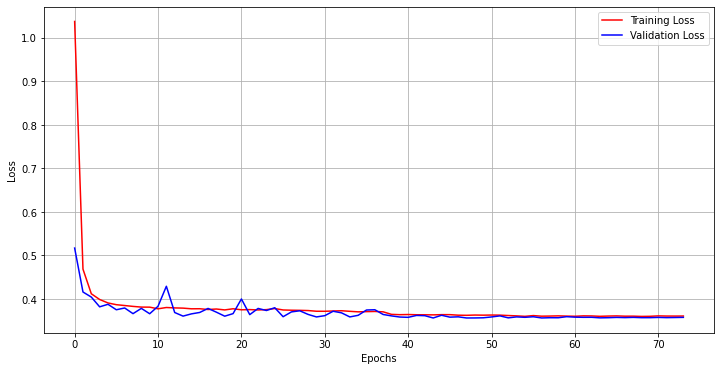

In [23]:
#Creation of the loss plot

losses = pd.DataFrame(data = {
    'epoch': [i for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(losses.epoch, losses.loss, 'red', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'blue', label = 'Validation Loss')
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [24]:
model.save("NN_full_data.keras")

# Scaled data

In [25]:
transformer = MinMaxScaler().fit(df_complete_inputs)

x_scaled = pd.DataFrame(transformer.transform(df_complete_inputs), columns = df_complete_inputs.columns)
y_scaled = df_complete_target

# Split into training+validation and testing sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(x_scaled.values, y_scaled.values, test_size=0.1, random_state=42)
# Split training+validation set into training and validation sets (Of the 80% for training and validation, 90*0.21 = 12% is validation and 68% is training )
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.21, random_state=42)

In [26]:
X_train.shape, X_test.shape, X_val.shape

((97450, 20), (13707, 20), (25905, 20))

In [27]:
# Neural network model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, min_lr=5e-6)
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

/home/acr/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8194 - loss: 0.4147 - val_accuracy: 0.8385 - val_loss: 0.3689 - learning_rate: 0.0010
Epoch 2/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8422 - loss: 0.3701 - val_accuracy: 0.8406 - val_loss: 0.3615 - learning_rate: 0.0010
Epoch 3/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8458 - loss: 0.3636 - val_accuracy: 0.8469 - val_loss: 0.3548 - learning_rate: 0.0010
Epoch 4/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8460 - loss: 0.3613 - val_accuracy: 0.8488 - val_loss: 0.3544 - learning_rate: 0.0010
Epoch 5/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8452 - loss: 0.3644 - val_accuracy: 0.8489 - val_loss: 0.3522 - learning_rate: 0.0010
Epoch 6/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8435 - loss: 0.3630 - val_accuracy: 0.8491 - val_loss: 0.3524 - learning_rate: 0.0010
Epoch 7/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accur

1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8509 - loss: 0.3471 - val_accuracy: 0.8541 - val_loss: 0.3435 - learning_rate: 2.0000e-04
Epoch 44/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8519 - loss: 0.3465 - val_accuracy: 0.8542 - val_loss: 0.3430 - learning_rate: 2.0000e-04
Epoch 45/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8548 - loss: 0.3409 - val_accuracy: 0.8547 - val_loss: 0.3420 - learning_rate: 2.0000e-04
Epoch 46/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8541 - loss: 0.3429 - val_accuracy: 0.8547 - val_loss: 0.3419 - learning_rate: 2.0000e-04
Epoch 47/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8529 - loss: 0.3432 - val_accuracy: 0.8549 - val_loss: 0.3419 - learning_rate: 2.0000e-04
Epoch 48/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8508 - loss: 0.3492 - val_accuracy: 0.8541 - val_loss: 0.3431 - learning_rate: 2.0000e-04
Epoch 49/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 

1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8550 - loss: 0.3412 - val_accuracy: 0.8554 - val_loss: 0.3412 - learning_rate: 5.0000e-06
Epoch 86/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8512 - loss: 0.3467 - val_accuracy: 0.8550 - val_loss: 0.3412 - learning_rate: 5.0000e-06
Epoch 87/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8533 - loss: 0.3423 - val_accuracy: 0.8554 - val_loss: 0.3412 - learning_rate: 5.0000e-06
Epoch 88/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8540 - loss: 0.3421 - val_accuracy: 0.8552 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 89/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8535 - loss: 0.3419 - val_accuracy: 0.8555 - val_loss: 0.3412 - learning_rate: 5.0000e-06
Epoch 90/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8549 - loss: 0.3401 - val_accuracy: 0.8554 - val_loss: 0.3412 - learning_rate: 5.0000e-06
Epoch 91/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 

Epoch 127/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8544 - loss: 0.3418 - val_accuracy: 0.8552 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 128/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8510 - loss: 0.3433 - val_accuracy: 0.8552 - val_loss: 0.3412 - learning_rate: 5.0000e-06
Epoch 129/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8557 - loss: 0.3394 - val_accuracy: 0.8553 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 130/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8541 - loss: 0.3409 - val_accuracy: 0.8552 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 131/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8544 - loss: 0.3404 - val_accuracy: 0.8555 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 132/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8535 - loss: 0.3429 - val_accuracy: 0.8552 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 133/2000
1523/1523 ━━━

Epoch 169/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8571 - loss: 0.3368 - val_accuracy: 0.8555 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 170/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8546 - loss: 0.3418 - val_accuracy: 0.8553 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 171/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8531 - loss: 0.3425 - val_accuracy: 0.8553 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 172/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8539 - loss: 0.3421 - val_accuracy: 0.8551 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 173/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8546 - loss: 0.3393 - val_accuracy: 0.8553 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 174/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8532 - loss: 0.3425 - val_accuracy: 0.8553 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 175/2000
1523/1523 ━━━

Epoch 211/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8531 - loss: 0.3440 - val_accuracy: 0.8551 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 212/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8536 - loss: 0.3418 - val_accuracy: 0.8553 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 213/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8543 - loss: 0.3426 - val_accuracy: 0.8554 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 214/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8534 - loss: 0.3405 - val_accuracy: 0.8554 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 215/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8523 - loss: 0.3447 - val_accuracy: 0.8554 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 216/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8534 - loss: 0.3433 - val_accuracy: 0.8554 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 217/2000
1523/1523 ━━━

Epoch 253/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8535 - loss: 0.3387 - val_accuracy: 0.8556 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 254/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8563 - loss: 0.3396 - val_accuracy: 0.8554 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 255/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8536 - loss: 0.3409 - val_accuracy: 0.8551 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 256/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8530 - loss: 0.3434 - val_accuracy: 0.8552 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 257/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8542 - loss: 0.3390 - val_accuracy: 0.8552 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 258/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8538 - loss: 0.3419 - val_accuracy: 0.8552 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 259/2000
1523/1523 ━━━

Epoch 295/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8523 - loss: 0.3449 - val_accuracy: 0.8552 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 296/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8535 - loss: 0.3425 - val_accuracy: 0.8549 - val_loss: 0.3411 - learning_rate: 5.0000e-06
Epoch 297/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8562 - loss: 0.3377 - val_accuracy: 0.8555 - val_loss: 0.3409 - learning_rate: 5.0000e-06
Epoch 298/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8571 - loss: 0.3373 - val_accuracy: 0.8553 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 299/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8545 - loss: 0.3423 - val_accuracy: 0.8553 - val_loss: 0.3409 - learning_rate: 5.0000e-06
Epoch 300/2000
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8555 - loss: 0.3392 - val_accuracy: 0.8550 - val_loss: 0.3410 - learning_rate: 5.0000e-06
Epoch 301/2000
1523/15

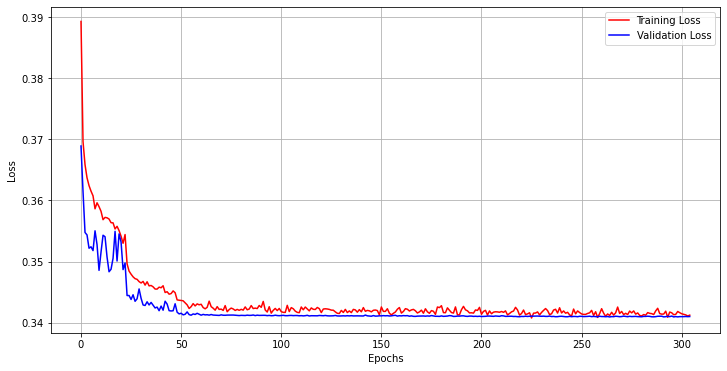

In [28]:
#Creation of the loss plot

losses = pd.DataFrame(data = {
    'epoch': [i for i in history.epoch],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})
losses = losses.groupby(by = 'epoch').mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(losses.epoch, losses.loss, 'red', label = 'Training Loss')
plt.plot(losses.epoch, losses.val_loss, 'blue', label = 'Validation Loss')
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [29]:
model.save("NN_full_data_scaled.keras")